# 1

> Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!  
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


Обозначим вероятность того, что правоохранительные органы поймали человека, который окажется преступником за $p$

Так как редкая группа крови находится лишь у 1% населения, то вероятность того, что у преступника могла оказаться редкая группа крови равна 1% , или $k = 0.01$. Именно эту вероятность и оценил прокурор, то есть вероятность того, что на месте преступления могла оказаться редкая группа крови.

Обозначим событие, когда у преступника оказывается редкая группа крови - $A$

Обозначим $B_1$ - событие, когда подсудимый преступник, и $B_2$, когда невиновный. То есть, $P(B_1)=p, P(B_2)=1-p$

Тогда $P(A|B_1)$ = 1 (Так как мы знаем, что у преступника редкая группа крови, то на месте преступления она и окажется)

$P(A|B_2) = k$  (Когда мы не знаем, что какая группа крови у преступника, вероятность обнаружить её на месте преступления равна k, то есть вероятности встретить эту группу крови у случайного человека из населения)

Вероятность того, что подсудимый является преступником, в таком случае, станет
$$
P(B_1|A) = \frac{P(A|B_1)*P(B_1)}{P(A)} = \frac{P(A|B_1)*P(B_1)}{P(A|B_1)*P(B_1) + P(A|B_2)*P(B_2)} = \frac{p}{p + k(1-p)}
$$

Соответственно, если нам было известна вероятность того, что органы поймали нужного человека, а именно $p$, то после выяснения факта о том, что у подсудимого редкая группа крови, эта вероятность увеличилась в 
$$
\frac{1}{p + k(1-p)}
$$
раз

Итого, прокурор верно оценил вероятноть того, что у подсудимого могла быть такая группа крови, если бы он был невиновен $P(A|B_2) = 1\%$, но неверно оценил вероятность того, что подсудимый виновен.

# 2

> Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.


Адвокат совершил неверное предположение о том, что все жители с редкой группой крови являются преступниками с одинаковой вероятностью

# 3

Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

1. Вероятность того, что человек болен после положительного теста

    $$
    p(d_1|t_1)=\frac{p(t_1|d_1)p(d_1)}{p(t_1} = \frac{p(t_1|d_1)p(d_1)}{p(t_1|d_1)p(d_1) + p(t_1|d_0)p(d_0)}
    $$

    $p(t_1|d_1)$ - шанс срабатывания, когда человек болен

    $p(t_1|d_0)$ - шанс срабатывания, когда человек не болен  

2. Вероятность того, что человек болен после отрицательного теста

    $$
    p(d_1|t_0)=\frac{p(t_0|d_1)p(d_1)}{p(t_1} = \frac{p(t_0|d_1)p(d_1)}{p(t_0|d_1)p(d_1) + p(t_0|d_0)p(d_0)}
    $$

    $p(t_0|d_1)$ - шанс несрабатывания, когда человек болен

    $p(t_0|d_0)$ - шанс несрабатывания, когда человек не болен

In [2]:
## если data = 1, тест положительный
def compute_posterior(test_result, prior_prob=0.01, true_positive=0.95, false_negative=0.95):
    t1d1 = true_positive
    t1d0 = 1 - true_positive
    if test_result == 1:
        t1d1 = true_positive
        t1d0 = 1 - true_positive
        return ( t1d1 * prior_prob) / (t1d1 * prior_prob + t1d0 * (1-prior_prob))
    elif test_result == 0:
        t0d0 = false_negative
        t0d1 = 1 - false_negative
        return (t0d1 * prior_prob) / (t0d1 * prior_prob + t0d0 * (1-prior_prob))
    else:
        return None

Будем сравнивать предполагаемые затраты ресурсов медицины на лечение людей. Также будем предполагать, что каждый больной требует такого лечения.

В случае, если мы начинаем лечить здорового человека, мы можем его заразить (И потратить 1 единицу ресурса)

Согласно https://xn--80aesfpebagmfblc0a.xn--p1ai/news/20200429-1432.html, контагиозность коронавируса ~3, то есть, когда мы пропускаем больного человека, то получаем ещё 3х заражённых. А значит, результат от False Negative можно смело умножать на 4 (Придётся лечить этого человека, когда симптомы станут явными, а также ещё троих).

Также будем исходить из предположения, что эти трое заражённых не успеют заразить других.

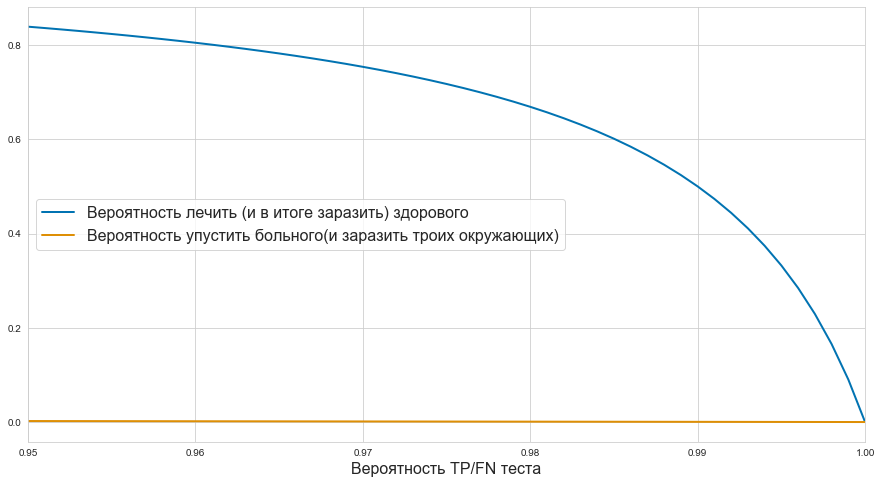

In [3]:
v_posterior = np.vectorize(compute_posterior, excluded=['data'])
xs = np.arange(0.95, 1, 0.001)
ys_contamine_healthy = 1 - v_posterior(1, true_positive=xs)
ys_miss_ill = v_posterior(0, false_negative=xs) * 4

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_contamine_healthy, linewidth=2, label=r'Вероятность лечить (и в итоге заразить) здорового')
ax.plot(xs, ys_miss_ill, linewidth=2, label='Вероятность упустить больного(и заразить троих окружающих)')
ax.set_xlim((0.95, 1))
ax.set_xlabel('Вероятность TP/FN теста', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
plt.show()

Из графика видно, что гораздо выгоднее снижать ошибку True Positive, то есть лучше уменьшать вероятность срабатывания теста на здоровом человеке.